# Logistics Regression


I implement Logistic Regression with Python and Scikit-Learn. I build a Logistic Regression classifier to predict whether or not it will rain tomorrow in Australia. I train a binary classification model using Logistic Regression.

Logistic Regression is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. 

Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. For example, we consider the example of number of hours studied and probability of passing the exam. Here, number of hours studied is the explanatory variable and it is denoted by x1. Probability of passing the exam is the response or target variable and it is denoted by z.

If we have one explanatory variable (x1) and one response variable (z), then the linear equation would be given mathematically with the following equation-

```z = β0 + β1x1```

Here, the coefficients β0 and β1 are the parameters of the model.

If there are multiple explanatory variables, then the above equation can be extended to

```z = β0 + β1x1+ β2x2+……..+ βnxn```

Here, the coefficients β0, β1, β2 and βn are the parameters of the model.

So, the predicted response value is given by the above equations and is denoted by z.

### Sigmoid Function

This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1.

In machine learning, **sigmoid function is used to map predictions to probabilities**. The sigmoid function has an S shaped curve. It is also called sigmoid curve.

A Sigmoid function is a special case of the Logistic function. It is given by the following mathematical formula.

Graphically, we can represent sigmoid function with the following graph.

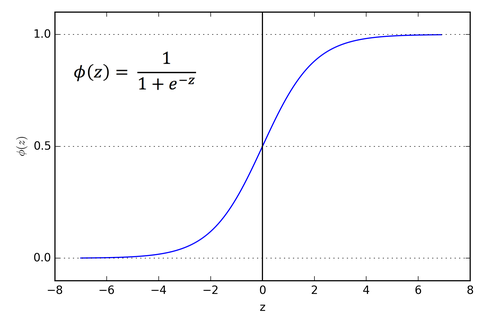

### Decision boundary

The sigmoid function **returns a probability value between 0 and 1**. This probability value is then mapped to a discrete class which is either “0” or “1”. **In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value**. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

- p ≥ 0.5 => class = 1

- p < 0.5 => class = 0

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below-

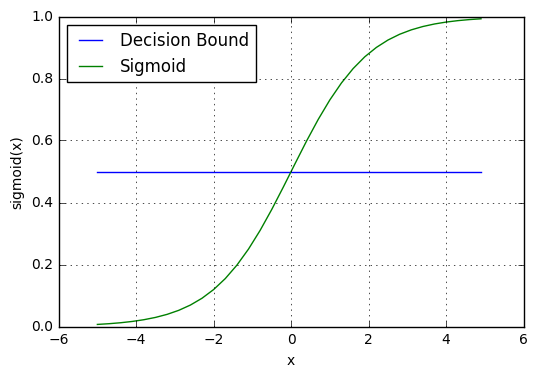

Now, we know about sigmoid function and decision boundary in logistic regression. We can use our knowledge of sigmoid function and decision boundary to write a prediction function. A prediction function in logistic regression returns the probability of the observation being positive, Yes or True. We call this as class 1 and it is denoted by P(class = 1). If the probability inches closer to one, then we will be more confident about our model that the observation is in class 1, otherwise it is in class 0.

### Assumptions of Logistic Regression

The Logistic Regression model requires several key assumptions. These are as follows:-

1. Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

2. It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

3. Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

4. Logistic Regression model assumes linearity of independent variables and log odds.

5. The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

### Types of Logistic Regression

Logistic Regression model can be classified into three groups based on the target variable categories. These three groups are described below:-

1. **Binary Logistic Regression** -
In Binary Logistic Regression, the target variable has two possible categories. The common examples of categories are yes or no, good or bad, true or false, spam or no spam and pass or fail.

2. **Multinomial Logistic Regression** -
In Multinomial Logistic Regression, the target variable has three or more categories which are not in any particular order. So, there are three or more nominal categories. The examples include the type of categories of fruits - apple, mango, orange and banana.

3. **Ordinal Logistic Regression** -
In Ordinal Logistic Regression, the target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories. For example, the student performance can be categorized as poor, average, good and excellent.

## Code part

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data\weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
df.shape

(255768, 24)

It is given in the dataset description, that we should drop the RISK_MM feature variable from the dataset description. So, we should drop it as follows-

In [4]:
df.drop(columns=["RISK_MM"], axis = 1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255768 entries, 0 to 255767
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           255768 non-null  object 
 1   Location       255768 non-null  object 
 2   MinTemp        251200 non-null  float64
 3   MaxTemp        251278 non-null  float64
 4   Rainfall       247876 non-null  float64
 5   Evaporation    110707 non-null  float64
 6   Sunshine       100342 non-null  float64
 7   WindGustDir    236837 non-null  object 
 8   WindGustSpeed  237031 non-null  float64
 9   WindDir9am     235693 non-null  object 
 10  WindDir3pm     244447 non-null  object 
 11  WindSpeed9am   250433 non-null  float64
 12  WindSpeed3pm   246090 non-null  float64
 13  Humidity9am    249726 non-null  float64
 14  Humidity3pm    244896 non-null  float64
 15  Pressure9am    227564 non-null  float64
 16  Pressure3pm    227583 non-null  float64
 17  Cloud9am       140510 non-nul

In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

In [6]:
numercical_columns = [n for n in df.columns if df[n].dtype == "float64"]
categorical_columns = list(filter(lambda x: x not in numercical_columns, df.columns))
print('The numerical variables are :', numercical_columns)
print('The categorical variables are :', categorical_columns)

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [7]:
df[categorical_columns].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


Summary:
- There is a date variable. It is denoted by Date column.
- There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, - - RainToday and RainTomorrow.
- There are two binary categorical variables - RainToday and RainTomorrow.
- RainTomorrow is the target variable.

In [8]:
with_null = [n for n in categorical_columns if df[n].isnull().sum() >0  ]
with_null

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [9]:
for n in categorical_columns:
    print(df[n].value_counts(normalize=True))

2017-07-17    0.000192
2013-10-29    0.000192
2013-10-22    0.000192
2013-10-23    0.000192
2013-10-24    0.000192
                ...   
2007-11-29    0.000004
2007-11-28    0.000004
2007-11-27    0.000004
2007-11-26    0.000004
2008-01-31    0.000004
Name: Date, Length: 5751, dtype: float64
Canberra            0.022485
Sydney              0.022126
Darwin              0.021535
Hobart              0.021535
Brisbane            0.021535
Melbourne           0.021535
Perth               0.021531
Wollongong          0.020937
AliceSprings        0.020937
Launceston          0.020937
Townsville          0.020937
GoldCoast           0.020937
Cairns              0.020937
Albury              0.020937
Tuggeranong         0.020933
Albany              0.020933
MountGambier        0.020933
Penrith             0.020933
Ballarat            0.020929
Bendigo             0.020902
MountGinini         0.020890
Williamtown         0.020816
Richmond            0.020816
Cobar               0.020816
CoffsHarbo

The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [10]:
for n in categorical_columns:
    print(f"Column {n} has {df[n].nunique()} labels")

Column Date has 5751 labels
Column Location has 49 labels
Column WindGustDir has 16 labels
Column WindDir9am has 16 labels
Column WindDir3pm has 16 labels
Column RainToday has 2 labels
Column RainTomorrow has 2 labels


We can see that there is a Date variable which needs to be preprocessed. I will do preprocessing in the following section.

All the other variables contain relatively smaller number of variables

## Feature Engineering of Date Variable

In [11]:
df['Date'].dtypes

dtype('O')

In [12]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df['Day'] = df['Date'].dt.day


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255768 entries, 0 to 255767
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           255768 non-null  datetime64[ns]
 1   Location       255768 non-null  object        
 2   MinTemp        251200 non-null  float64       
 3   MaxTemp        251278 non-null  float64       
 4   Rainfall       247876 non-null  float64       
 5   Evaporation    110707 non-null  float64       
 6   Sunshine       100342 non-null  float64       
 7   WindGustDir    236837 non-null  object        
 8   WindGustSpeed  237031 non-null  float64       
 9   WindDir9am     235693 non-null  object        
 10  WindDir3pm     244447 non-null  object        
 11  WindSpeed9am   250433 non-null  float64       
 12  WindSpeed3pm   246090 non-null  float64       
 13  Humidity9am    249726 non-null  float64       
 14  Humidity3pm    244896 non-null  float64       
 15  

In [14]:
df.drop(columns=["Date"], axis = 1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Exploring categorical data

Now, I will explore the categorical variables one by one.

In [15]:
categorical = [n for n in df.columns if df[n].dtype == "O"]
print(f"There are {len(categorical)} categorical variables")

There are 6 categorical variables


In [16]:
df[categorical].isnull().sum()

Location            0
WindGustDir     18931
WindDir9am      20075
WindDir3pm      11321
RainToday        7892
RainTomorrow     7892
dtype: int64

In [17]:
# print number of labels in Location variable

df["Location"].unique()


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [18]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()


,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')
# check labels in WindGustDir variable

df['WindGustDir'].unique()
df.WindGustDir.value_counts()



WindGustDir contains 17 labels


W      17135
SE     16635
E      16336
S      16131
SSW    15892
SSE    15742
WSW    15522
N      15521
SW     15389
ENE    14472
WNW    14317
NW     14075
ESE    13530
NE     12833
NNE    11698
NNW    11609
Name: WindGustDir, dtype: int64

In [20]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [21]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    14472
ESE    13530
N      15521
NE     12833
NNE    11698
NNW    11609
NW     14075
S      16131
SE     16635
SSE    15742
SSW    15892
SW     15389
W      17135
WNW    14317
WSW    15522
NaN    18931
dtype: int64

We can see that there are 18931 missing values in WindGustDir variable.



In [22]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')
df["WindDir9am"].unique()
df['WindDir9am'].value_counts()


WindDir9am contains 17 labels


N      19717
SE     16538
E      16469
SSE    16141
S      15082
SW     14683
NW     14653
W      14401
ESE    14172
NNE    14163
ENE    13905
NNW    13667
SSW    13470
WNW    13288
NE     13267
WSW    12077
Name: WindDir9am, dtype: int64

In [23]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE    13905
ESE    14172
N      19717
NE     13267
NNE    14163
NNW    13667
NW     14653
S      15082
SE     16538
SSE    16141
SSW    13470
SW     14683
W      14401
WNW    13288
WSW    12077
NaN    20075
dtype: int64

We can see that there are 20075 missing values in the WindDir9am variable.



In [25]:
print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')
df['WindDir3pm'].unique()
df['WindDir3pm'].value_counts()


WindDir3pm contains 17 labels


SE     18434
W      17290
S      17037
WSW    16387
SSE    15870
SW     15737
WNW    15470
ESE    15235
N      15123
SSW    14832
E      14664
NE     14572
NW     14571
ENE    13821
NNW    13493
NNE    11911
Name: WindDir3pm, dtype: int64

In [26]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE    13821
ESE    15235
N      15123
NE     14572
NNE    11911
NNW    13493
NW     14571
S      17037
SE     18434
SSE    15870
SSW    14832
SW     15737
W      17290
WNW    15470
WSW    16387
NaN    11321
dtype: int64

There are 3778 missing values in the WindDir3pm variable.



In [27]:
print('RainToday contains', len(df['RainToday'].unique()), 'labels')
df['RainToday'].unique()
df.RainToday.value_counts()
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis = 0)



RainToday contains 3 labels


Yes    54811
NaN     7892
dtype: int64

There are 7892 missing values in the RainToday variable.



### Exploring numerical data

In [28]:
numerical = [var for var in df.columns if df[var].dtype != 'O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [29]:
df[numerical].head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


Summary of numerical variables:

- There are 16 numerical variables.
- These are given by MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am and Temp3pm.
- All of the numerical variables are of continuous type.

In [30]:
df[numerical].isnull().sum()


MinTemp            4568
MaxTemp            4490
Rainfall           7892
Evaporation      145061
Sunshine         155426
WindGustSpeed     18737
WindSpeed9am       5335
WindSpeed3pm       9678
Humidity9am        6042
Humidity3pm       10872
Pressure9am       28204
Pressure3pm       28185
Cloud9am         115258
Cloud3pm         121255
Temp9am            4569
Temp3pm            9509
Year                  0
Month                 0
Day                   0
dtype: int64

In [31]:
# view summary statistics in numerical variables
round(df[numerical].describe(), 2)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,251200.00,251278.00,247876.00,110707.00,100342.00,237031.00,250433.00,246090.00,249726.00,244896.00,227564.00,227583.00,140510.00,134513.00,251199.00,246259.00,255768.00,255768.00,255768.00
mean,12.03,23.16,2.32,5.48,7.62,39.93,14.02,18.52,69.19,51.57,1017.78,1015.34,4.75,4.71,16.86,21.65,2016.51,6.55,15.72
std,6.41,7.10,8.45,4.16,3.78,13.50,8.83,8.68,19.38,21.00,7.08,7.04,2.90,2.76,6.51,6.96,4.76,3.41,8.80
min,-8.70,-4.10,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,978.60,972.00,0.00,0.00,-6.20,-5.10,2007.00,1.00,1.00
25%,7.50,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,36.00,1013.00,1010.50,2.00,2.00,12.20,16.60,2012.00,4.00,8.00
50%,11.80,22.60,0.00,4.80,8.50,39.00,13.00,17.00,70.00,52.00,1017.70,1015.30,6.00,5.00,16.60,21.10,2017.00,7.00,16.00
75%,16.60,28.10,0.60,7.40,10.60,48.00,19.00,24.00,84.00,66.00,1022.60,1020.20,7.00,7.00,21.40,26.40,2021.00,9.00,23.00
max,33.90,48.90,474.00,138.70,14.50,154.00,87.00,87.00,100.00,100.00,1042.50,1040.30,9.00,9.00,40.20,48.20,2024.00,12.00,31.00


On closer inspection, we can see that the Rainfall, Evaporation, WindSpeed9am, RiskMM and WindSpeed3pm columns may contain outliers. I will draw boxplots to visualise outliers in the above variables.



Text(0, 0.5, 'WindSpeed3pm')

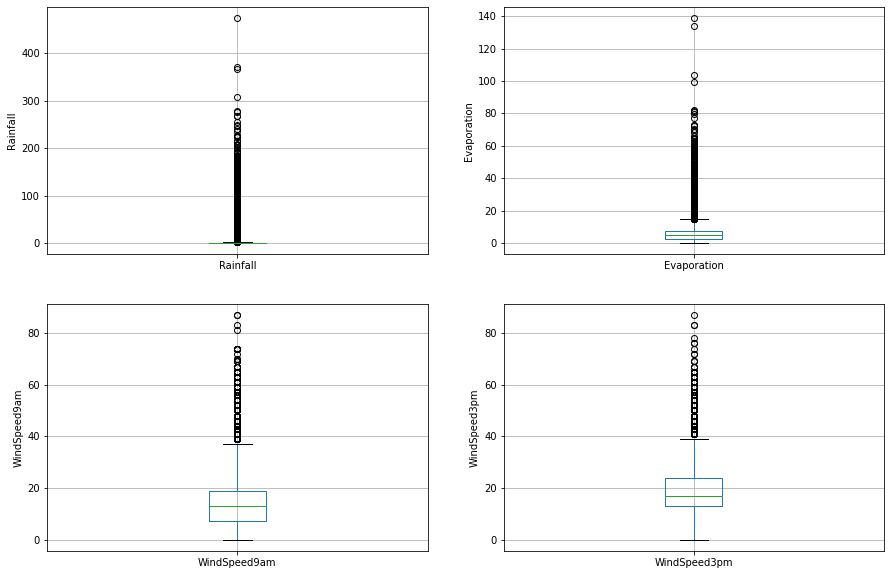

In [32]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
fig = df.boxplot(column="Rainfall")
fig.set_title("")
fig.set_ylabel("Rainfall")


plt.subplot(2,2,2)
fig = df.boxplot(column="Evaporation")
fig.set_title("")
fig.set_ylabel("Evaporation")

plt.subplot(2,2,3)
fig = df.boxplot(column = "WindSpeed9am")
fig.set_title("")
fig.set_ylabel("WindSpeed9am")



plt.subplot(2,2,4)

fig = df.boxplot("WindSpeed3pm")
fig.set_title("")
fig.set_ylabel("WindSpeed3pm")

The above boxplots confirm that there are lot of outliers in these variables.



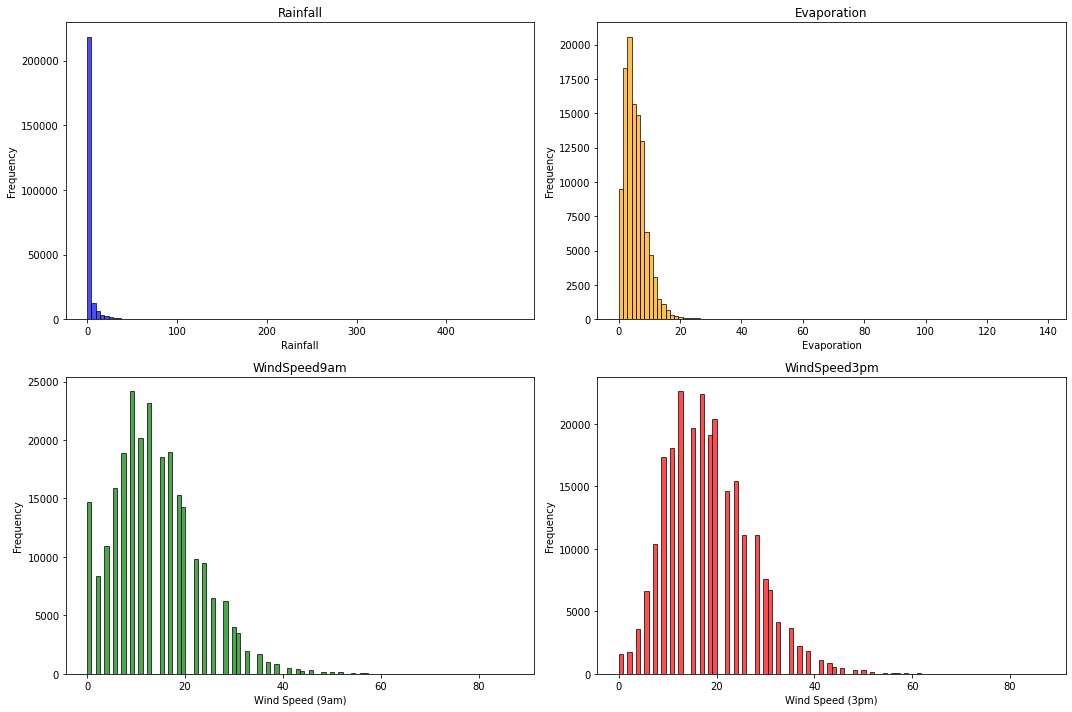

In [33]:

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(df["Rainfall"], bins=100, color='blue', alpha=0.7, edgecolor='black')
plt.title("Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
plt.hist(df["Evaporation"], bins=100, color='orange', alpha=0.7, edgecolor='black')
plt.title("Evaporation")
plt.xlabel("Evaporation")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
plt.hist(df["WindSpeed9am"], bins=100, color='green', alpha=0.7, edgecolor='black')
plt.title("WindSpeed9am")
plt.xlabel("Wind Speed (9am)")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.hist(df["WindSpeed3pm"], bins=100, color='red', alpha=0.7, edgecolor='black')
plt.title("WindSpeed3pm")
plt.xlabel("Wind Speed (3pm)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.

In [34]:
potential_outlier_cols = ["Evaporation", "Rainfall", "WindSpeed9am", "WindSpeed3pm"]
for n in potential_outlier_cols:

    IQR = df[n].quantile(0.75) - df[n].quantile(0.25)
    Lower_fence = df[n].quantile(0.25) - (IQR*3)
    Upper_fence = df[n].quantile(0.75) + (IQR*3)
    print('{n} outliers are values < {lowerboundary} or > {upperboundary}'.format(n=n,lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004
Rainfall outliers are values < -1.7999999999999998 or > 2.4
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


### Declare feature vector and target variable

In [35]:
df.dropna(subset =["RainTomorrow"], axis = 0, inplace=True)

X = df.drop(columns=["RainTomorrow"], axis = 1)
Y = df["RainTomorrow"]
# Y.isnull().sum()

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((198300, 24), (49576, 24))

## Feature Engineering

### Engineering missing values in numerical variables

In [37]:
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [38]:
categorical = [n for n in X_train.columns if df[n].dtype=="O"]
numerical = [n for n in X_train.columns if df[n].dtype!="O"]
categorical, numerical

(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'],
 ['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm',
  'Year',
  'Month',
  'Day'])

In [39]:
X_train[numerical].isnull().sum()

MinTemp             998
MaxTemp             696
Rainfall           1975
Evaporation      111147
Sunshine         119382
WindGustSpeed     13320
WindSpeed9am       3638
WindSpeed3pm       7094
Humidity9am        2170
Humidity3pm        6020
Pressure9am       21337
Pressure3pm       21346
Cloud9am          87574
Cloud3pm          92308
Temp9am            1014
Temp3pm            4922
Year                  0
Month                 0
Day                   0
dtype: int64

In [40]:
X_train[categorical].isnull().sum()


Location           0
WindGustDir    13461
WindDir9am     15230
WindDir3pm      8395
RainToday       1975
dtype: int64

In [41]:
# print percentage of missing values in the numerical variables in training set

round(X_train[numerical].isnull().mean(), 2)


MinTemp          0.01
MaxTemp          0.00
Rainfall         0.01
Evaporation      0.56
Sunshine         0.60
WindGustSpeed    0.07
WindSpeed9am     0.02
WindSpeed3pm     0.04
Humidity9am      0.01
Humidity3pm      0.03
Pressure9am      0.11
Pressure3pm      0.11
Cloud9am         0.44
Cloud3pm         0.47
Temp9am          0.01
Temp3pm          0.02
Year             0.00
Month            0.00
Day              0.00
dtype: float64

I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. **Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only**. This is to avoid overfitting.

In [42]:
for n in numerical:
    if(X_train[n].isnull().sum()>0):
        col_median = X_train[n].median()
        X_train[n].fillna(col_median, inplace = True)
        X_test[n].fillna(col_median, inplace = True)

X_train[numerical].isnull().sum()
        

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

### Engineering missing values in categorical variables

In [43]:
X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.067882
WindDir9am     0.076803
WindDir3pm     0.042335
RainToday      0.009960
dtype: float64

In [44]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [45]:
X_train[categorical].isnull().mean()

Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
dtype: float64

### Engineering outliers in numerical variables

In [46]:
def max_value(df, column, upper_bound):
    # If True: Replace the value with top (capping it at the threshold).
    # If False: Keep the original value (df[column]).  
    return np.where(df[column]>upper_bound, upper_bound, df[column])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)
    df3['Rainfall'] = max_value(df3, 'Rainfall', 2.4)


In [47]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000
mean,12.008485,23.160089,0.543557,5.068467,8.150750,39.813046,13.968749,18.472779,69.175234,51.503555,1017.840085,1015.424882,5.291286,4.843480,16.843900,21.638406,2016.476062,6.554281,15.720676
std,6.391758,7.076336,0.921349,2.442988,2.417109,13.032313,8.735450,8.523864,19.286052,20.657262,6.696074,6.637141,2.256193,2.026986,6.483302,6.865144,4.766215,3.408453,8.792419
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,978.600000,972.000000,0.000000,0.000000,-6.200000,-5.100000,2007.000000,1.000000,1.000000
25%,7.500000,17.900000,0.000000,4.800000,8.500000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.700000,1011.200000,5.000000,5.000000,12.200000,16.700000,2012.000000,4.000000,8.000000
50%,11.800000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,17.000000,70.000000,52.000000,1017.800000,1015.400000,6.000000,5.000000,16.600000,21.100000,2017.000000,7.000000,16.000000
75%,16.600000,28.100000,0.600000,4.800000,8.500000,46.000000,19.000000,24.000000,84.000000,65.000000,1022.000000,1019.600000,6.000000,6.000000,21.400000,26.200000,2021.000000,10.000000,23.000000
max,32.800000,48.900000,2.400000,21.800000,14.500000,137.000000,55.000000,57.000000,100.000000,100.000000,1042.500000,1040.300000,9.000000,9.000000,40.200000,48.200000,2024.000000,12.000000,31.000000


### Encode categorical variables

In [48]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
18915,CoffsHarbour,NW,NW,ESE,No
40587,NorfolkIsland,S,S,S,No
75750,Wollongong,NNE,N,NNE,No
46139,Penrith,NW,N,SE,Yes
169764,Adelaide,WNW,NNE,WNW,No


In [49]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols = ["RainToday"])

X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
18915,CoffsHarbour,8.5,22.6,0.0,4.8,8.5,NW,31.0,NW,ESE,...,1018.8,6.0,5.0,18.5,22.1,0,1,2018,5,18
40587,NorfolkIsland,18.3,23.1,0.4,2.2,8.5,S,35.0,S,S,...,1010.0,6.0,5.0,21.0,22.1,0,1,2022,12,18
75750,Wollongong,20.5,26.0,0.0,4.8,8.5,NNE,41.0,N,NNE,...,1007.5,1.0,2.0,23.5,24.1,0,1,2015,1,9
46139,Penrith,9.3,13.9,2.0,4.8,8.5,NW,6.0,N,SE,...,1015.4,6.0,5.0,11.8,13.7,1,0,2023,7,4
169764,Adelaide,3.0,15.0,0.0,0.8,6.4,WNW,20.0,NNE,WNW,...,1024.5,6.0,5.0,7.9,14.2,0,1,2010,7,6


We can see that two additional variables RainToday_0 and RainToday_1 are created from RainToday variable.

Now, I will create the X_train training set.

In [50]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [51]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
219569,16.9,26.4,2.4,4.8,8.5,43.0,22.0,15.0,92.0,69.0,...,0,0,0,0,0,0,0,0,0,0
167362,17.1,29.4,0.8,4.8,8.5,43.0,6.0,26.0,72.0,59.0,...,0,0,0,0,0,0,0,0,0,0
173871,4.5,11.6,2.4,0.6,4.3,41.0,15.0,15.0,80.0,55.0,...,0,0,0,0,0,0,1,0,0,0
130544,4.2,13.1,1.6,4.8,8.5,39.0,9.0,30.0,85.0,58.0,...,0,0,0,0,0,0,0,0,0,1
73796,11.6,18.8,0.0,4.8,8.5,44.0,19.0,15.0,54.0,42.0,...,0,0,0,0,0,0,0,0,1,0


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.

## Feature Scaling

In [52]:
X_train.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,...,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000
mean,12.008485,23.160089,0.543557,5.068467,8.150750,39.813046,13.968749,18.472779,69.175234,51.503555,...,0.052915,0.057821,0.067070,0.113903,0.062052,0.058396,0.062012,0.067726,0.060373,0.064594
std,6.391758,7.076336,0.921349,2.442988,2.417109,13.032313,8.735450,8.523864,19.286052,20.657262,...,0.223864,0.233406,0.250144,0.317694,0.241251,0.234492,0.241178,0.251275,0.238178,0.245809
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.500000,17.900000,0.000000,4.800000,8.500000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.800000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,17.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.600000,28.100000,0.600000,4.800000,8.500000,46.000000,19.000000,24.000000,84.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,32.800000,48.900000,2.400000,21.800000,14.500000,137.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
cols = X_train.columns

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # normalization - good for algorithms that are sensitive to data scales [0,1]
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [55]:
X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns = [cols])

In [56]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,...,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000,198300.000000
mean,0.499000,0.514341,0.226482,0.232499,0.562121,0.280097,0.253977,0.324084,0.691752,0.515036,...,0.052915,0.057821,0.067070,0.113903,0.062052,0.058396,0.062012,0.067726,0.060373,0.064594
std,0.154018,0.133516,0.383895,0.112064,0.166697,0.096536,0.158826,0.149541,0.192861,0.206573,...,0.223864,0.233406,0.250144,0.317694,0.241251,0.234492,0.241178,0.251275,0.238178,0.245809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.390361,0.415094,0.000000,0.220183,0.586207,0.214815,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.493976,0.503774,0.000000,0.220183,0.586207,0.274074,0.236364,0.298246,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.609639,0.607547,0.250000,0.220183,0.586207,0.325926,0.345455,0.421053,0.840000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We now have X_train dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

## Model Training

In [57]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver="liblinear", random_state=42)
logreg.fit(X_train, Y_train)

print("Weights (coefficients):", len(logreg.coef_[0]))
print("Bias (intercept):", logreg.intercept_)

Weights (coefficients): 118
Bias (intercept): [-2.59548362]


In [58]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

**predict_proba method** method gives the probabilities for the target variable(0 and 1) in this case, in array form.

0 is for probability of no rain and 1 is for probability of rain.

In [59]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:, 0]

array([0.31433536, 0.91323482, 0.80547566, ..., 0.52745327, 0.95649059,
       0.8894194 ])

In [60]:
# probability of getting output as 1 - rain
logreg.predict_proba(X_test)[:,1]

array([0.68566464, 0.08676518, 0.19452434, ..., 0.47254673, 0.04350941,
       0.1105806 ])

## Check accuracy score

In [61]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_test)))

Model accuracy score: 0.8447


Here, y_test are the true class labels and y_pred_test are the predicted class labels in the test-set.




Now, I will compare the train-set and test-set accuracy to check for overfitting. (Compare the train-set and test-set accuracy)

In [62]:
y_pred_train = logreg.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train)))


Training-set accuracy score: 0.8498


The training-set accuracy score is 0.8447 while the test-set accuracy to be 0.8498. These two values are quite comparable. So, there is **no question of overfitting.**

In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting.

I will increase C and fit a more flexible model.

- For larger values of C (λ is small), the model allows for more complex relationships between the features and the target variable.
- For small values of C (λ is large), the model tends to minimise the weights (w) of the features, which may lead to undertraining.

In [63]:
logreg100 = LogisticRegression(C = 100, solver="liblinear", random_state=42)
logreg.fit(X_train, Y_train)

y_predict_test_100 = logreg.predict(X_test)
accuracy_diff = accuracy_score(Y_test, y_predict_test_100)
print(f"Accuracy with C=100 is: {accuracy_diff}")
print('Training set score: {:.4f}'.format(accuracy_score(logreg.predict(X_train), Y_train)))


Accuracy with C=100 is: 0.844662740035501
Training set score: 0.8498


We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.

In [64]:
logreg001 = LogisticRegression(C=0.01, solver = "liblinear", random_state=42)
logreg001.fit(X_train, Y_train)

y_predict_test_001 = logreg001.predict(X_test)
accuracy_diff = accuracy_score(Y_test, y_predict_test_001)
print(f"Accuracy with C=0.01 is: {accuracy_diff}")
print('Training set score: {:.4f}'.format(logreg001.score(X_train, Y_train)))



Accuracy with C=0.01 is: 0.8429885428433113
Training set score: 0.8452


So, if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relatiev to the default parameters.

### Compare model accuracy with null accuracy

So, the model accuracy is 0.8501. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. 

**Null accuracy** is the accuracy that could be achieved by always predicting the most frequent class.

In [65]:
# check class distribution in test set

Y_test.value_counts()

No     38512
Yes    11064
Name: RainTomorrow, dtype: int64

We can see that the occurences of most frequent class is 38512. So, we can calculate null accuracy by dividing 38512 by total number of occurences.

In [66]:
null_accuracy = 38512/(38512+11064)
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))


Null accuracy score: 0.7768


We can see that our model accuracy score is 0.8501 but null accuracy score is 0.7759. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called **Confusion matrix** that comes to our rescue.

## Confusion matrix 

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:

- **True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.
- **True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.
- **False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation **actually does not belong** to that class. This type of error is called Type I error.
- **False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation **actually belongs** to that class. This is a very serious error and it is called Type II error.

In [67]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred_test)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[35815  2697]
 [ 5004  6060]]

True Positives(TP) =  35815

True Negatives(TN) =  6060

False Positives(FP) =  2697

False Negatives(FN) =  5004


The confusion matrix shows 35815 + 6060 = 24177 correct predictions and 2697 + 5004 = 4262 incorrect predictions.

In this case, we have

- True Positives (Actual Positive:1 and Predict Positive:1) - 35815
- True Negatives (Actual Negative:0 and Predict Negative:0) - 6060
- False Positives (Actual Negative:0 but Predict Positive:1) - 2697 (Type I error)
- False Negatives (Actual Positive:1 but Predict Negative:0) - 5004 (Type II error)

<AxesSubplot:>

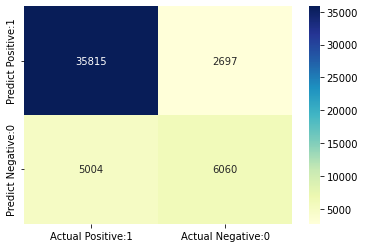

In [68]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification metrices

**Classification report** - another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

In [69]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.88      0.93      0.90     38512
         Yes       0.69      0.55      0.61     11064

    accuracy                           0.84     49576
   macro avg       0.78      0.74      0.76     49576
weighted avg       0.84      0.84      0.84     49576



The model performs worse at predicting the Yes class, which is often due to data imbalance (fewer examples for Yes).

In [70]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [71]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8447


In [72]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1553


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP). (**"Of all the objects that the model predicted as positive, how many of them are actually positive?"**)

In [73]:
# print precision score

precision = TP / float(TP + FP) # how many true positive among all that we predicted


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9300


**Recall** can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN). (**"Of all the actual positive cases, how many did the model correctly predict?"**)

In [74]:
recall = TP / float(TP + FN) # how many true positive among all the positive

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8774


In [75]:
true_positive_rate = TP / float(TP + FN) # same as recall


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8774


In [76]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3080


In [77]:
specificity = TN / (TN + FP) # "Of all the real negative cases, how many did the model correctly classify?"

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6920


**f1-score** is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

## Adjusting the threshold level

In [78]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.31433536, 0.68566464],
       [0.91323482, 0.08676518],
       [0.80547566, 0.19452434],
       [0.79522702, 0.20477298],
       [0.92861234, 0.07138766],
       [0.1886745 , 0.8113255 ],
       [0.93524773, 0.06475227],
       [0.9228332 , 0.0771668 ],
       [0.16054065, 0.83945935],
       [0.39478833, 0.60521167]])

In [79]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.314335,0.685665
1,0.913235,0.086765
2,0.805476,0.194524
3,0.795227,0.204773
4,0.928612,0.071388
5,0.188674,0.811326
6,0.935248,0.064752
7,0.922833,0.077167
8,0.160541,0.839459
9,0.394788,0.605212


In [80]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([0.68566464, 0.08676518, 0.19452434, 0.20477298, 0.07138766,
       0.8113255 , 0.06475227, 0.0771668 , 0.83945935, 0.60521167])

In [81]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

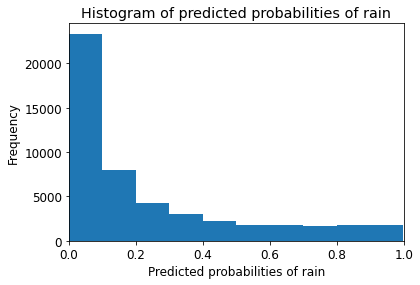

In [82]:
# plot histogram of predicted probabilities


plt.rcParams['font.size'] = 12


plt.hist(y_pred1, bins = 10)


plt.title('Histogram of predicted probabilities of rain')


plt.xlim(0,1)


plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

We can see that the above histogram is highly positive skewed.
- The first column tell us that there are approximately 15000 observations with probability between 0.0 and 0.1.
- There are small number of observations with probability > 0.5.
- So, these small number of observations predict that there will be rain tomorrow.
- Majority of observations predict that there will be no rain tomorrow.

In [93]:
from sklearn.preprocessing import binarize
# Lower the threshold

for i in range(1,7):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, threshold=i/10)
    
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    
    cm1 = confusion_matrix(Y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(Y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[22412 16100]
 [  891 10173]] 

 with 32585 correct predictions,  

 16100 Type I errors( False Positives),  

 891 Type II errors( False Negatives),  

 Accuracy score:  0.6572736808132967 

 Sensitivity:  0.919468546637744 

 Specificity:  0.5819484835895306 



With 0.2 threshold the Confusion Matrix is  

 [[29244  9268]
 [ 2064  9000]] 

 with 38244 correct predictions,  

 9268 Type I errors( False Positives),  

 2064 Type II errors( False Negatives),  

 Accuracy score:  0.7714216556398257 

 Sensitivity:  0.8134490238611713 

 Specificity:  0.7593477357706688 



With 0.3 threshold the Confusion Matrix is  

 [[32494  6018]
 [ 3064  8000]] 

 with 40494 correct predictions,  

 6018 Type I errors( False Positives),  

 3064 Type II errors( False Negatives),  

 Accuracy score:  0.8168065192835243 

 Sensitivity:  0.7230657989877078 

 Specificity:  0.8437370170336519 



With 0.4 threshold the Confusion Matrix is  

 [[34478  403

- In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.
- Threshold can be adjusted to increase sensitivity or specificity.
- Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.
- We can see that increasing the threshold level results in increased accuracy.
- Adjusting the threshold level should be one of the last step you do in the model-building process.

## ROC - AUC

Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

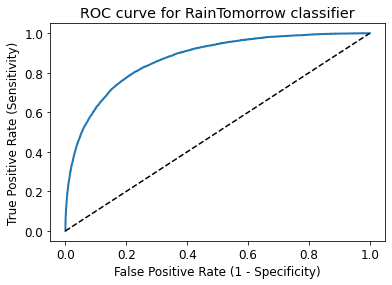

In [94]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

**ROC AUC** stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [95]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(Y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8711


ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [96]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, Y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8718


In [97]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, Y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.84712557 0.85022693 0.85113464 0.84914271 0.8494705 ]
Average cross-validation score: 0.8494


## Hyperparameter Optimization using GridSearch CV

In [98]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [99]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, Y_test)))

GridSearch CV best score : 0.8495


Parameters that give the best results : 

 {'C': 1000}


Estimator that was chosen by the search : 

 LogisticRegression(C=1000, random_state=42, solver='liblinear')
GridSearch CV score on test set: 0.8431


: 

Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507.
We can see that GridSearch CV improve the performance for this particular model.

## Results and conclusion

- The logistic regression model accuracy score is 0.8501. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.
- Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.
- The model shows no signs of overfitting.
- Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.
- Increasing the threshold level results in increased accuracy.
- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.
- Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced set of features.
- In the original model, we have FP = 1175 whereas FP1 = 1174. So, we get approximately same number of false positives. Also, FN = 3087 whereas FN1 = 3091. So, we get slighly higher false negatives.
- Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.
- Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507. We can see that GridSearch CV improve the performance for this particular model.